In [ ]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib 
from matplotlib import pyplot as plt 
pd.set_option('display.max_columns',None)
import seaborn as sns 
from shapely.geometry import Point, Polygon 


dataset = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
dataset.drop(['Unnamed: 0'],inplace=True,axis=1)
dataset

In [7]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [8]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [9]:
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 

,PARENT NUMBER,COUNT,Percent
0,nan,77818,49.287773
1,5863311.0,11939,7.561833
2,450720289.0,6814,4.315799
3,5889993.0,4397,2.784938
4,7521503.0,3574,2.263673
5,441412723.0,2499,1.582798
6,5995907.0,2493,1.578997
7,200026573.0,2217,1.404187
8,238136725.0,2105,1.333249
9,714232249.0,1760,1.114735


In [10]:
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 
#trying to add column of the employee number 
EmployeeNumber = grocery_sic['LOCATION EMPLOYEE SIZE CODE']
#EmployeeNumber.append(grocery_sic)
#EmployeeNumber
EmployeeNumber['LOCATION EMPLOYEE SIZE CODE'] = grocery_t10_22['LOCATION EMPLOYEE SIZE CODE']
EmployeeNumber


KeyError: 'LOCATION EMPLOYEE SIZE CODE'

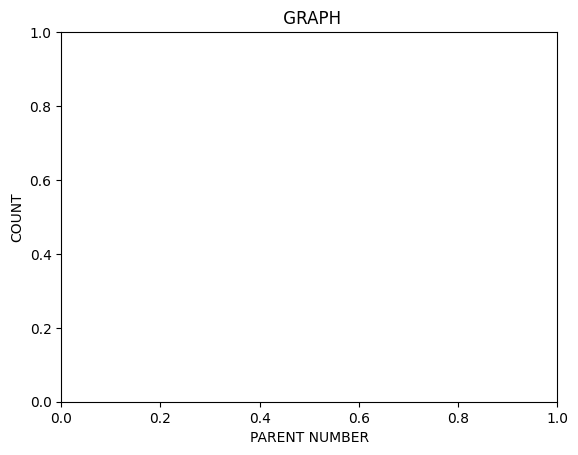

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#parent number would be on the  x-axis, percentage would be on the y-axis 
PARENTNUMBER = ['nan', '586331.0', '450730389.0', '5889993.0','7521503.0','441412723.0','5995907.0','200026573.0','238136725.0','714232249.0','433922353.0','other']
COUNT = [77818, 11939, 6814, 4397, 3574,2499,2493,2217,2105,1760,1755,40514]

#bar_labels = ['red']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

#ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_xlabel('PARENT NUMBER')
ax.set_ylabel('COUNT')
ax.set_title(' GRAPH')
#ax.legend(title='Fruit color')

plt.show()



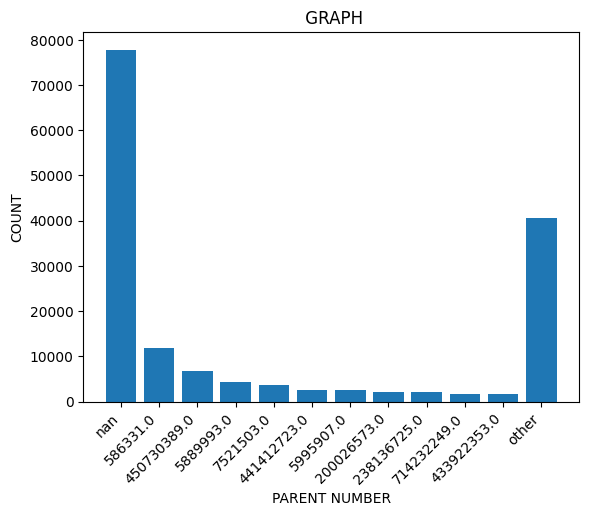

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#parent number would be on the  x-axis, percentage would be on the y-axis 
PARENTNUMBER = ['nan', '586331.0', '450730389.0', '5889993.0','7521503.0','441412723.0','5995907.0','200026573.0','238136725.0','714232249.0','433922353.0','other']
COUNT = [77818, 11939, 6814, 4397, 3574,2499,2493,2217,2105,1760,1755,40514]

# Add the bar graph
ax.bar(PARENTNUMBER, COUNT)

ax.set_xlabel('PARENT NUMBER')
ax.set_ylabel('COUNT')
ax.set_title(' GRAPH')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


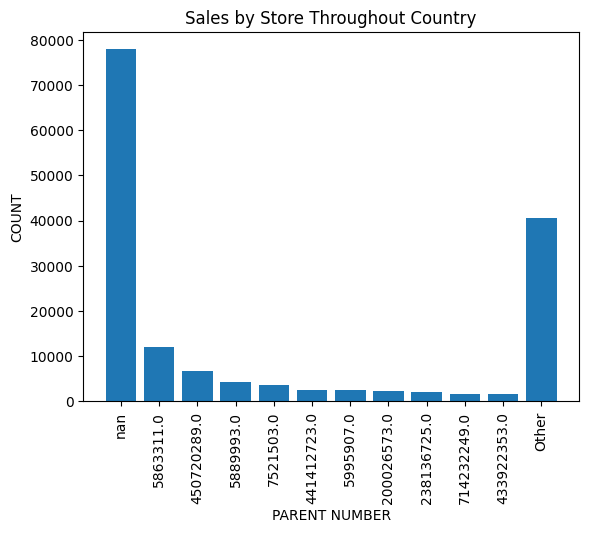

In [13]:
x = grocery_t10_22['PARENT NUMBER']
y = grocery_t10_22['COUNT']



plt.bar(x, y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('COUNT')
plt.title('Sales by Store Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

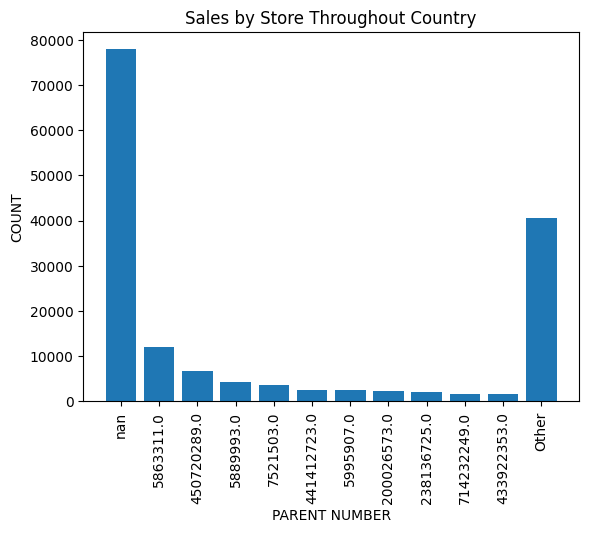

In [14]:
x = grocery_t10_22['PARENT NUMBER']
y = grocery_t10_22['COUNT']


plt.bar(x, y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('COUNT')
plt.title('Sales by Store Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
dataset.count()

In [15]:
dataset_group = dataset.groupby(['COMPANY','PARENT NUMBER']).tail().count()
#dataset.drop(columns=['Unnamed: 0'])
dataset_group
#Do a bar chart to see how the market share is divided by parent company 

COMPANY                         8856
ADDRESS LINE 1                  8845
CITY                            8856
STATE                           8856
ZIPCODE                         8856
ZIP4                            7867
COUNTY CODE                     8856
AREA CODE                       8856
IDCODE                          8856
LOCATION EMPLOYEE SIZE CODE     8614
LOCATION SALES VOLUME CODE      7859
PRIMARY SIC CODE                8856
SIC6_DESCRIPTIONS               8856
PRIMARY NAICS CODE              8828
NAICS8 DESCRIPTIONS             8828
SIC CODE                        6004
SIC6_DESCRIPTIONS (SIC)         6002
SIC CODE 1                      3697
SIC6_DESCRIPTIONS (SIC1)        3693
SIC CODE 2                      1869
SIC6_DESCRIPTIONS(SIC2)         1866
SIC CODE 3                       754
SIC6_DESCRIPTIONS(SIC3)          754
SIC CODE 4                       322
SIC6_DESCRIPTIONS(SIC4)          322
ARCHIVE VERSION YEAR            8856
YELLOW PAGE CODE                4699
E

In [16]:
StateData = dataset.groupby(['STATE','PARENT NUMBER']).count()
#StateData = df[df['STATE'] == 'GA']
StateData


COMPANY  ADDRESS LINE 1  CITY  ZIPCODE  ZIP4  \
STATE PARENT NUMBER                                                 
AK    5863311.0           25              25    25       25    21   
      5889993.0            6               6     6        6     6   
      5995907.0           22              22    22       22    19   
      7521503.0           12              12    12       12    11   
      400080801.0          1               1     1        1     0   
...                      ...             ...   ...      ...   ...   
WY    850307737.0          1               1     1        1     1   
      885216069.0          2               2     2        2     1   
      886012012.0          1               1     1        1     1   
      891525875.0          3               3     3        3     3   
      905376588.0          4               4     4        4     4   

                     COUNTY CODE  AREA CODE  IDCODE  \
STATE PARENT NUMBER                                   
AK    5863311.0               25         25      25   
      5889993.0                6          6       6   
      5995907.0               22         22      22   
      7521503.0               12         12      12   
      400080801.0              1          1       1   
...                          ...        ...     ...   
WY    850307737.0              1          1       1   
      885216069.0              2          2       2   
      886012012.0              1          1       1   
      891525875.0              3          3       3   
      905376588.0              4          4       4   

                     LOCATION EMPLOYEE SIZE CODE  LOCATION SALES VOLUME CODE  \
STATE PARENT NUMBER                                                            
AK    5863311.0                               24                          24   
      5889993.0                                6                           5   
      5995907.0                               22                          22   
      7521503.0                               12                          12   
      400080801.0                              1                           1   
...                                          ...                         ...   
WY    850307737.0                              1                           1   
      885216069.0                              2                           2   
      886012012.0                              1                           1   
      891525875.0                              3                           3   
      905376588.0                              2                           2   

                     PRIMARY SIC CODE  SIC6_DESCRIPTIONS  PRIMARY NAICS CODE  \
STATE PARENT NUMBER                                                            
AK    5863311.0                    25                 25                  25   
      5889993.0                     6                  6                   0   
      5995907.0                    22                 22                  22   
      7521503.0                    12                 12                  12   
      400080801.0                   1                  1                   1   
...                               ...                ...                 ...   
WY    850307737.0                   1                  1                   1   
      885216069.0                   2                  2                   2   
      886012012.0                   1                  1                   1   
      891525875.0                   3                  3                   3   
      905376588.0                   4                  4                   4   

                     NAICS8 DESCRIPTIONS  SIC CODE  SIC6_DESCRIPTIONS (SIC)  \
STATE PARENT NUMBER                                                           
AK    5863311.0                       25        24                       24   
      5889993.0                        0         1                        1   
      599

In [17]:
StateData = dataset.groupby(['STATE']).count()
plt.figure(figsize=(17,6))
plt.bar(StateData[STATE],StateData[PARENTNUMBER])
plt.title('Grocery Stores By State')
plt.xlabel('STATE')
plt.ylabel('PARENT NUMBER')
plt.show()

NameError: name 'STATE' is not defined

<Figure size 1700x600 with 0 Axes>

In [18]:
GroceryStoresInGA = StateData.groupby('COMPANY')
GroceryStoresInGA

In [21]:


#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 

,PARENT NUMBER,COUNT,Percent
0,nan,77818,49.287773
1,5863311.0,11939,7.561833
2,450720289.0,6814,4.315799
3,5889993.0,4397,2.784938
4,7521503.0,3574,2.263673
5,441412723.0,2499,1.582798
6,5995907.0,2493,1.578997
7,200026573.0,2217,1.404187
8,238136725.0,2105,1.333249
9,714232249.0,1760,1.114735


In [ ]:
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 



ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (202478,).

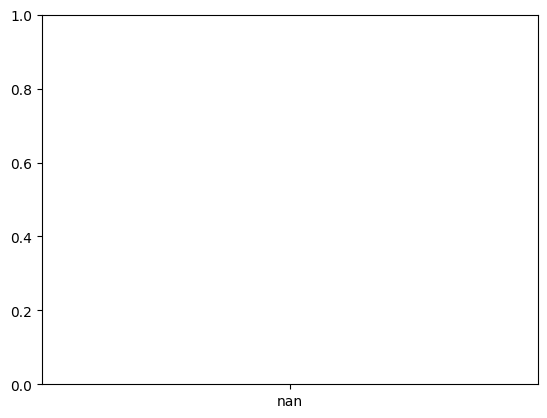

In [29]:
x = grocery_t10_22['PARENT NUMBER']
y = stores_2022['PARENT ACTUAL SALES VOLUME']



plt.bar(x,y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('PARENT ACTUAL SALES VOLUME')
plt.title('Sales by Store Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()
